# Componentes Principales Mediante el uso de PCA

En estadística, el análisis de componentes principales (en español ACP, en inglés, PCA) es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables («componentes») no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.

Técnicamente, el ACP busca la proyección según la cual los datos queden mejor representados en términos de mínimos cuadrados. Esta convierte un conjunto de observaciones de variables posiblemente correlacionadas en un conjunto de valores de variables sin correlación lineal llamadas componentes principales.

El ACP se emplea sobre todo en análisis exploratorio de datos y para construir modelos predictivos. El ACP comporta el cálculo de la descomposición en autovalores de la matriz de covarianza, normalmente tras centrar los datos en la media de cada atributo.

## Objetivos
* Mediante PCA cree un algortihmo que permita identificar los componentes principales de images de rostros de 512x512
* Crear un algoritmo que utilizando LBP y PCA puede realizar el reconocimiento de caras de los compañeros.


## Implementación
Para la elaboración de esté trabajo se realizó la creación de un dataset basado en las fografías proporcionadas por los compañeros del curso las cuales se pueden encontrar aquí [1]. Estas constan de 10 imágenes aproximadamente por por persona en un formato de 512 x 512 pixeles. El dataset se elaboró con el script que llamado "generate_csv" que puede encontrarse aquí [2].

### Sección #1: Preparación del entorno.

- Vamos a necesitar varias librerias para trabajar entre ellas Numpy, Pandas, Matplotlib, Sklearn. Por lo tanto, haremos importación de ellas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

- Ahora, debemos cargar nuestro set de datos para poder iniciar a trabajar. El dataset en formato cvs puede ser descargado desde aquí [3].

In [27]:
df = pd.read_csv("personas.csv")
# Aquí separamos las etiquetas de nombre y los pixeles.
targets = df["Label"]
pixels = df.drop(["Label"],axis=1)

- Podemos visualizar como lucen nuestras imagenes al cargarlas, sin aplicar aún el análisis de compontentes con PCA.

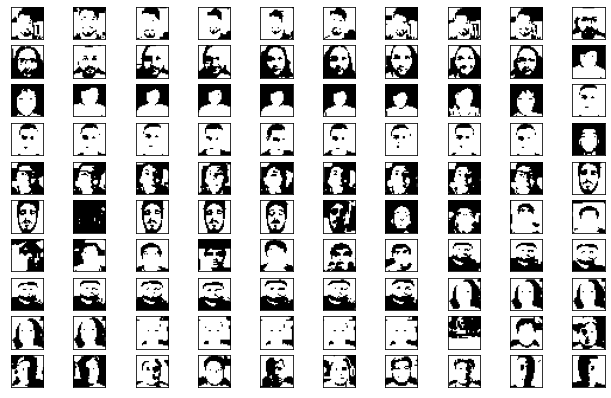

In [28]:
def show_orignal_images(pixels):
  # Modify the first two numbers change the quantity of images displayed.
	fig, axes = plt.subplots(10, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(28, 28), cmap='gray')
	plt.show()
show_orignal_images(pixels)

- Ahora utilizando lay de pareto hacemos la segmentación de los datos de entrenamiento en un 70 para train y un 30 para test.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(pixels, targets, test_size=0.30, random_state=50)

## Seccion #2: aplicando PCA
- Esta grafica representa el valance que se logra al aplicar PCA con una x Cantidad de componentes. En nuestro caso al tener más de 110 podemos alcanza un valance de más del 90%.


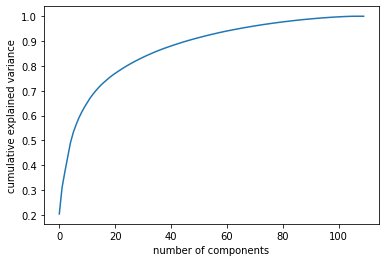

In [30]:
## Step 3: Perform PCA.
pca = PCA(n_components=110).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

- Para cumplir con el primer objetivo vamos a visualizar cuales son las características principales encontradas tras valancear las imágenes utilizando PCA.

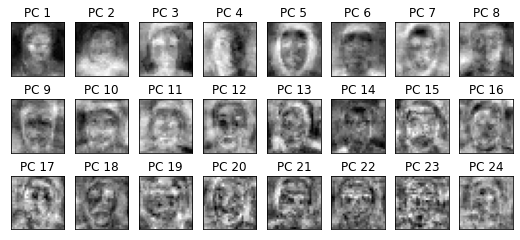

In [31]:
def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()
show_eigenfaces(pca)

### Sección #3: entrenando modelo para reconocer rostros.

- Ahora se configura el entorno para poder crear un modelo de detección usando PCA.

In [32]:
## Step 4: Project Training data to PCA
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)

Projecting the input data on the eigenfaces orthonormal basis


- Inicializamos y entrenamos nuestro modelo con los datos de entrenamiento.

In [33]:
## Step 5: Initialize Classifer and fit training data
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)

- Es hora de evaluar el modelo que entrenamos, para ello vamos a ver el porcentaje de predicción en cada una de las comparaciones del conjunto de entrenamiento y la precisión del algoritmo en general.

In [34]:
## Step 6: Perform testing and get classification report
print("Predicting people's names on the test set")
t0 = time()
Xtest_pca = pca.transform(x_test)
y_pred = clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

Predicting people's names on the test set
done in 0.007s
               precision    recall  f1-score   support

      Brandon       1.00      1.00      1.00         2
      CarlosC       1.00      1.00      1.00         3
Daniel Amador       1.00      1.00      1.00         4
       Danilo       1.00      1.00      1.00         2
        Diego       1.00      0.67      0.80         3
       Fabian       0.50      1.00      0.67         1
Fabian Zamora       1.00      1.00      1.00         2
        Jason       1.00      1.00      1.00         5
       Javier       0.67      1.00      0.80         2
     Jonathan       1.00      1.00      1.00         3
      Kevin S       0.50      0.33      0.40         3
          Leo       1.00      1.00      1.00         2
       Miguel       1.00      1.00      1.00         4
      Randald       1.00      1.00      1.00         1
      Rodolfo       0.60      0.60      0.60         5
       Warner       1.00      1.00      1.00         6

     a

- Como podemos ver el algoritmo tiene un 90% de precisión en el reconocimiento de los rostros de los estudiantes del curso.

# Referencias:
- [1] https://drive.google.com/drive/folders/1IhufSGU5Llbp_3pO8lw2A4g3cz12IlRB?usp=sharing.
- [2]
- [3] 